# Л.р. №2: линейная регрессия

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy import randn

---

## Часть 1. Изучение данных

In [3]:
data = pd.read_csv('prices.txt')

In [4]:
data.head()

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
data.describe()

,area,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


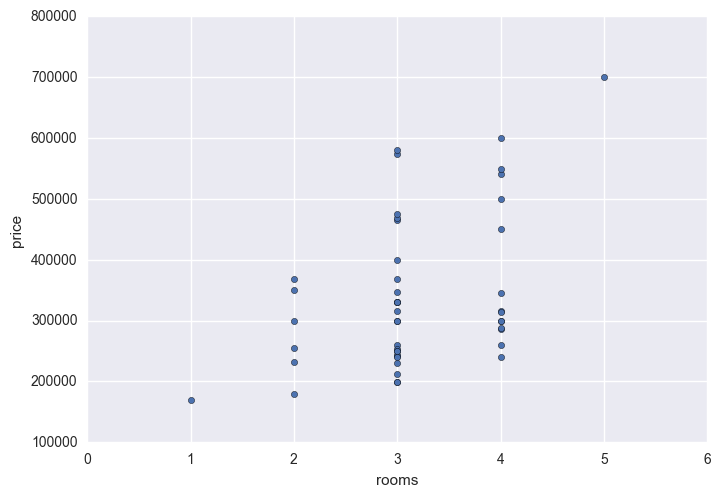

In [6]:
data.plot(kind='scatter', x='rooms', y='price')

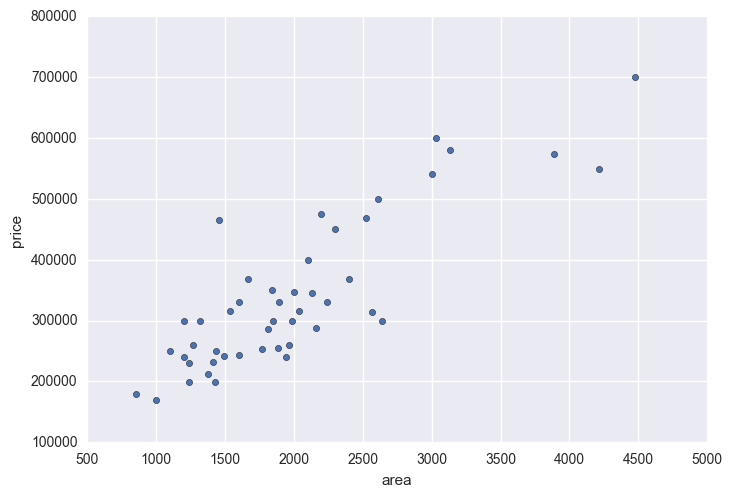

In [7]:
data.plot(kind='scatter', x='area', y='price')

In [8]:
scalerX = StandardScaler()
scalerY = StandardScaler()

In [9]:
X = data[['area', 'rooms']]
y = np.array(list(map(float, data['price'])))
y = scalerY.fit_transform(y.reshape(len(y), 1)).reshape(len(y))
X = scalerX.fit_transform(X)
X = np.append(np.ones(len(X)).reshape((len(X), 1)), X, axis=1)

## Часть 2. Градиентный спуск

In [10]:
def grad_descend(X, y, theta, alphas, numIter):
    Xt = X.transpose()
    m = X.shape[0]
    mse = None
    for i in range(numIter):
        h = np.dot(X, theta)
        diff = h - y
        grad = np.dot(Xt, diff) / m
        mse = np.sum(diff ** 2) / (2 * m)
        theta -= alphas[i] * grad
    return theta, mse

In [11]:
%%time

m, n = X.shape
numIter = 100
theta = np.ones(n)
alphas = [0.5] * numIter

theta_grad, mse_grad = grad_descend(X, y, theta, alphas, numIter)

CPU times: user 8.87 ms, sys: 406 µs, total: 9.28 ms
Wall time: 11 ms


In [12]:
print('weights\t\t\t=', theta_grad)
print('MSE, gradient descent\t=', mse_grad)

('weights\t\t\t=', array([ -8.27871734e-17,   8.84765988e-01,  -5.31788197e-02]))
('MSE, gradient descent\t=', 0.13352749098554287)


---

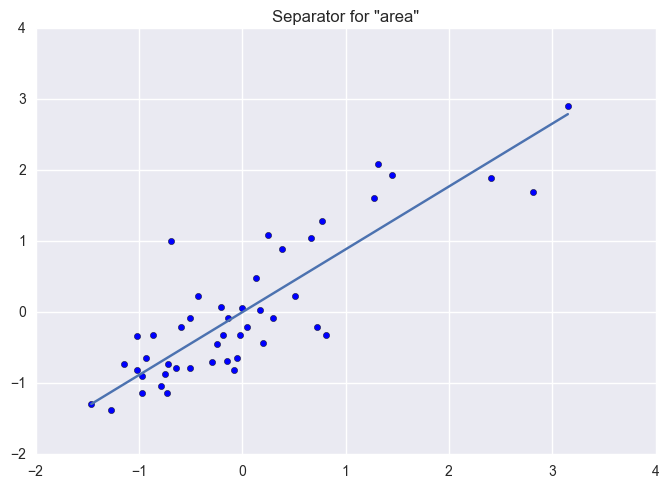

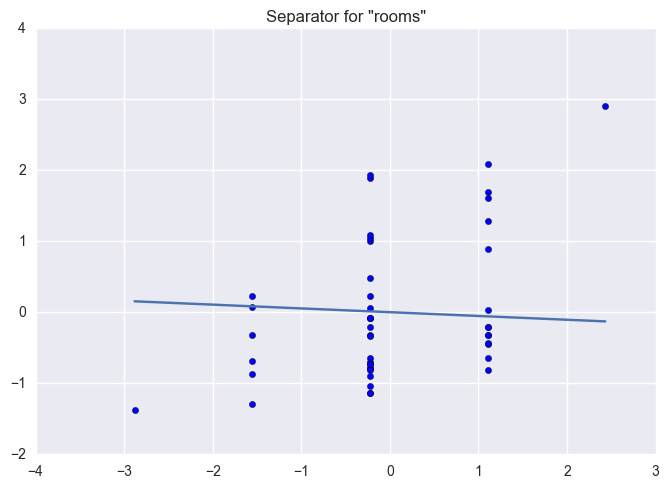

In [13]:
for i, x in enumerate(X.transpose()[1:], 1):
    plt.scatter(x, y)
    plt.plot([x.min(), x.max()], [theta_grad[0] + theta_grad[i] * x.min(), theta_grad[0] + theta_grad[i] * x.max()])
    plt.title('Separator for "%s"' % ['area', 'rooms'][i - 1])
    plt.show()

---

## Часть 3. Генетический алгоритм

In [14]:
%%time

np.random.seed(42)

def mutation(pop):
    return pop + randn(*pop.shape)

m, n = X.shape
popSize = 10
numIter = 100

pop = np.zeros((popSize, n))
pops = []
mses = []

for i in range(numIter):
    pops = pop.copy()
    for j in range(5):
        pops = np.append(pops, mutation(pop), axis=0)
    mses = []
    for j, single_pop in enumerate(pops):
        h = np.dot(X, single_pop)
        diff = h - y
        mse = np.sum(diff ** 2) / (2 * m)
        mses.append((mse, j))
    mses = sorted(mses)
    pop = pops[mses[0][1]].reshape(1, len(pops[mses[0][1]]))
    for _, j in mses[1:popSize]:
        pop = np.append(pop, pops[j].reshape(1, len(pops[j])), axis=0)

theta_gen = pops[mses[0][1]]
mse_gen = mses[0][0]

CPU times: user 263 ms, sys: 3.35 ms, total: 266 ms
Wall time: 469 ms


In [15]:
print('weights\t\t\t=', theta_gen)
print('MSE, evolutionary algo\t=', mse_gen)

('weights\t\t\t=', array([ 0.02901476,  0.85093362, -0.02469385]))
('MSE, evolutionary algo\t=', 0.1343867822147381)


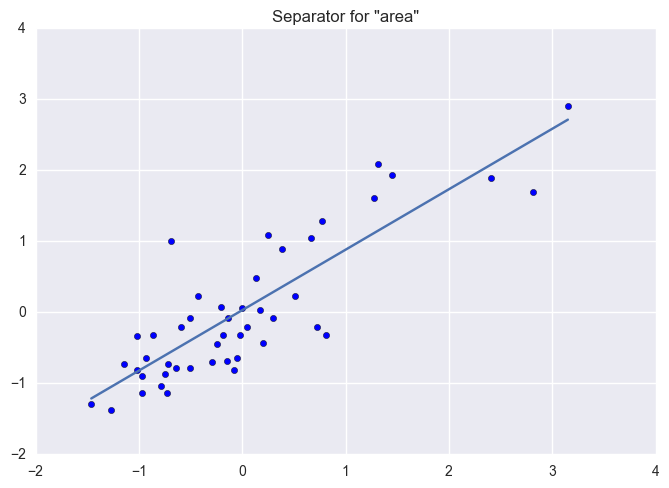

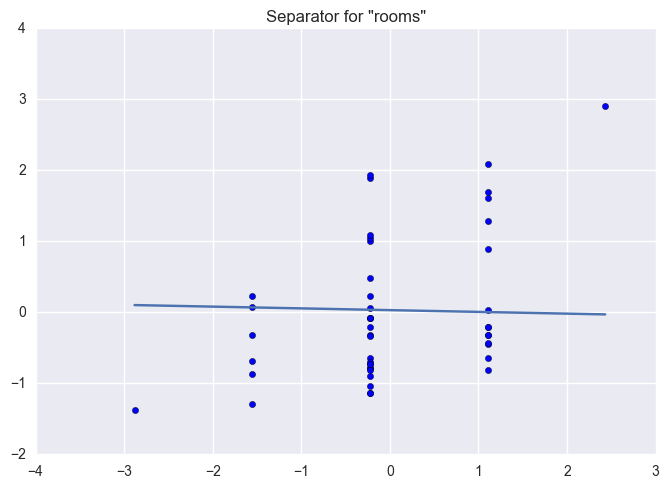

In [16]:
for i, x in enumerate(X.transpose()[1:], 1):
    plt.scatter(x, y)
    plt.plot([x.min(), x.max()], [theta_gen[0] + theta_gen[i] * x.min(), theta_gen[0] + theta_gen[i] * x.max()])
    plt.title('Separator for "%s"' % ['area', 'rooms'][i - 1])
    plt.show()

---

## Часть 4. Использование моделей

#### Зададим параметры жилья

In [17]:
#     area    rooms
x = [ 4500.,  5. ]

#### Предскажем стоимость жилья, используя градиентный спуск

In [18]:
pred_grad = scalerY.inverse_transform([theta_grad.dot(np.append([1], scalerX.transform([x])))])[0]

print('Predicted price\t= %.3f' % pred_grad)

Predicted price	= 672355.847


#### Предскажем стоимость жилья, используя генетический алгоритм

In [19]:
pred_gen = scalerY.inverse_transform([theta_gen.dot(np.append([1], scalerX.transform([x])))])[0]

print('Predicted price\t= %.3f' % pred_gen)

Predicted price	= 671204.832
